In [33]:
# importing the libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from pywaffle import Waffle

In [18]:
# load the cars dataset from a csv file:

df_cars = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [19]:
# checking the imported database:

df_cars.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2C4RC1N71H,Kitsap,Bremerton,WA,98311.0,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,23.0,349437882,POINT (-122.6466274 47.6341188),PUGET SOUND ENERGY INC,5.303509e+10
1,2C4RC1N7XL,Stevens,Colville,WA,99114.0,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,7.0,154690532,POINT (-117.90431 48.547075),AVISTA CORP,5.306595e+10
2,KNDC3DLCXN,Yakima,Yakima,WA,98908.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14.0,219969144,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA0J,Kitsap,Bainbridge Island,WA,98110.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,476786887,POINT (-122.5235781 47.6293323),PUGET SOUND ENERGY INC,5.303509e+10
4,1N4AZ1CP7J,Thurston,Tumwater,WA,98501.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,35.0,201185253,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


# WordCloud for make

In [40]:
# make a list of words:

df_cars.Make.unique()



array(['CHRYSLER', 'KIA', 'TESLA', 'NISSAN', 'MINI', 'TOYOTA', 'FORD',
       'VOLVO', 'CHEVROLET', 'FIAT', 'AUDI', 'BMW', 'JEEP', 'POLESTAR',
       'HONDA', 'VOLKSWAGEN', 'LINCOLN', 'MERCEDES-BENZ', 'RIVIAN',
       'PORSCHE', 'HYUNDAI', 'SUBARU', 'SMART', 'JAGUAR', 'MITSUBISHI',
       'CADILLAC', 'LEXUS', 'ALFA ROMEO', 'MAZDA', 'GENESIS', 'LUCID',
       'LAND ROVER', 'DODGE', 'TH!NK', 'WHEEGO ELECTRIC CARS', 'FISKER',
       'BENTLEY', 'AZURE DYNAMICS'], dtype=object)

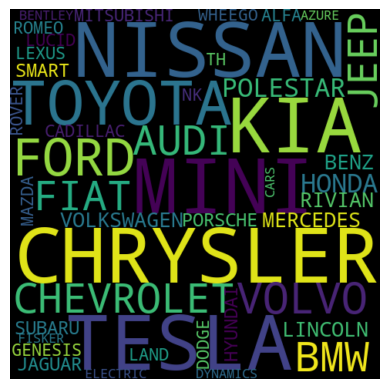

In [49]:
# use these to make a wordCloud:

text = 'CHRYSLER, KIA, TESLA, NISSAN, MINI, TOYOTA, FORD, VOLVO, CHEVROLET, FIAT, \
       AUDI, BMW, JEEP, POLESTAR, \
       HONDA, VOLKSWAGEN, LINCOLN, MERCEDES-BENZ, RIVIAN, \
       PORSCHE, HYUNDAI, SUBARU, SMART, JAGUAR, MITSUBISHI, \
       CADILLAC, LEXUS, ALFA ROMEO, MAZDA, GENESIS, LUCID, \
       LAND ROVER, DODGE, TH!NK, WHEEGO ELECTRIC CARS, FISKER, \
       BENTLEY, AZURE DYNAMICS'

# create the wordcloud object:

wc = WordCloud(width = 480, height = 480, margin = 0).generate(text)


plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

# Seaborn Use Cases: simple

Text(0, 0.5, 'Number of Cars')

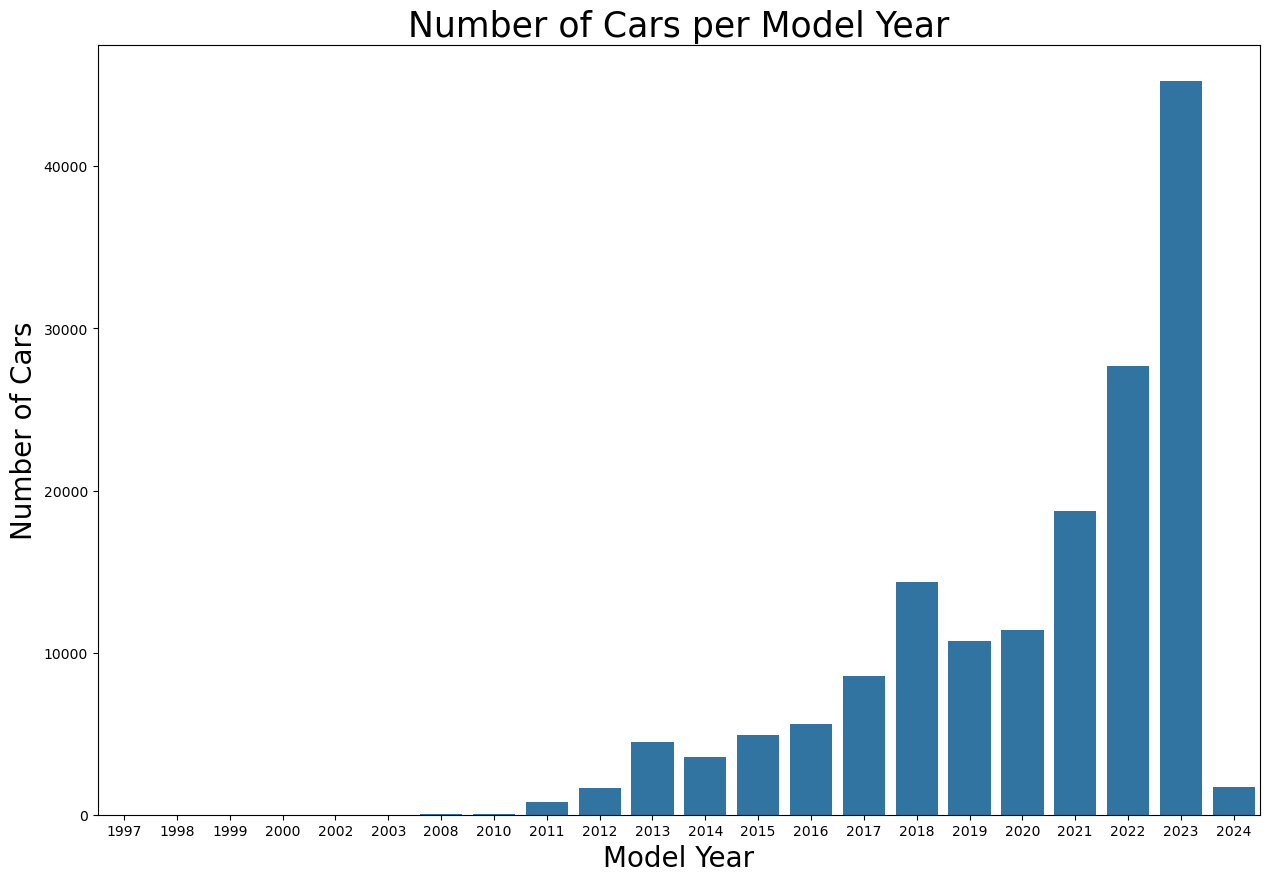

In [66]:
# countplot:

fig, ax = plt.subplots(figsize = (15,10))

sns.countplot(x = 'Model Year',
              data = df_cars)

plt.title('Number of Cars per Model Year', size = 25)
plt.xlabel('Model Year', size = 20)
plt.ylabel('Number of Cars', size = 20)

# Seaborn Use Cases: Regression


In [100]:
# to create a dataframe of years and total number of e-cars:

df_group = pd.DataFrame(df_cars.groupby('Model Year')['VIN (1-10)'].count())

# reset the indexes and years into float:
df_group.index = map(float, df_group.index)
df_group.reset_index(inplace=True)

# re-name:
df_group.columns = ['year', 'cars per year']

df_group.tail(10)


,year,cars per year
12,2015.0,4897
13,2016.0,5604
14,2017.0,8576
15,2018.0,14328
16,2019.0,10730
17,2020.0,11394
18,2021.0,18737
19,2022.0,27680
20,2023.0,45244
21,2024.0,1714


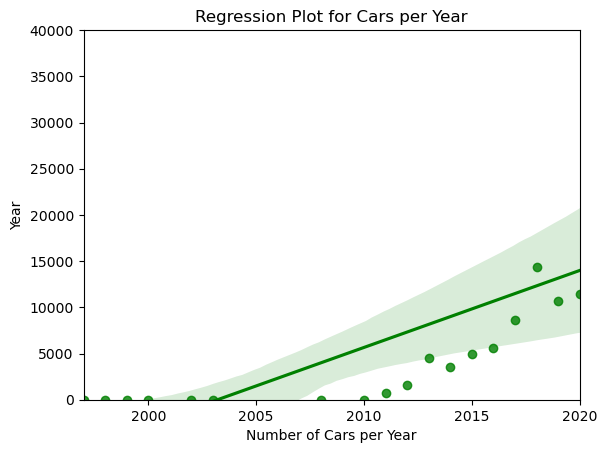

In [103]:
# creating the regression plot:

sns.regplot(x = 'year',
            y = 'cars per year',
            data = df_group,
            color = 'green',
           )

plt.title('Regression Plot for Cars per Year')
plt.xlabel('Number of Cars per Year')
plt.ylabel('Year')
plt.xlim(1997,2020)
plt.ylim(0,40000)
plt.show()